# Popular Data Science Questions

Our goal in this project is to answer the question "What is it that people want to learn about in data science?". By learning something new (related to programming and DS) everyone starts searching this in different search engines. Maybe the most popular and one of the first searches is Stack Overflow and other Stack Exchange hosts sites.<br> 

### Stack Exchange

Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:

* Data Science
* Cross Validated — a statistics site
* Artificial Intelligence
* Mathematics
* Stack Overflow


These sites represent an attractive target for our research because StackExchange makes a great deal of data about the sites content and activity available through a SQL-based data portal.

In order to understand the available data its helpful to take a closer look at a typical StackExchange web site. Let's focus on DSSE, for obvious reasons.

Looking at the Data Science StackExchange, we see that the body of the homepage is filled with questions asked on the site that are considered "active" at the time the page loaded. This view can also be switched to show the "hot" questions of the past few days, week or month. Finally, one can look at questions that people have placed "bounties" on.



#### What information is available in each post?
Looking, just as an example, at this question, some of the information we see is:

For both questions and answers:
- The posts's score;
- The posts's title;
- The posts's author;
- The posts's body;


For questions only: 
- How many users have it on their "
- The last time the question as active;
- How many times the question was viewed;
- Related questions;
- The question's tags;


### Getting the Data

The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.
- CreationDate: The date and time of creation of the post.
- Score: The post's score.
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: How many times the question was favored (only applicable to question posts).

To start, I'll extraced metadata, including tags, for question and answer posts made in 2019.
<br>
<br>
`
SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
`
<br>
<br>
Results exported and stored alongside this notebook in 2019_DSSE_posts_metadata_extract.csv

### Exploring the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])
questions.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We see that only `FavoriteCount` has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

### Cleaning the Data

Let's start with an evaluation of our FavoriteCount column.

In [4]:
questions["FavoriteCount"] = questions["FavoriteCount"].fillna(0)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)

Let's now modify Tags to make it easier to work with.



In [5]:
questions["Tags"] = questions["Tags"].str.replace("<", "").str.replace(">", ",")
questions["Tags"] = questions["Tags"].str.split(",")

In [6]:
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
5226,62661,2019-11-04 15:48:26,0,14,"[machine-learning, python, predictive-modeling...",0,0
8199,54748,2019-06-29 18:28:34,2,73,"[nlp, xgboost, prediction, performance, ]",1,1
2329,47392,2019-03-16 04:38:14,2,170,"[linear-regression, normalization, ]",1,0


### Most Used and Most Viewed

In [7]:
tag_count = {}
for tag_list in questions['Tags']:
    for tag in tag_list:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

tags = pd.DataFrame(list(tag_count.items()), columns = ['tag','count'])

tags.sort_values('count',ascending=False).head(10)

,tag,count
0,,8839
24,machine-learning,2693
199,python,1814
72,deep-learning,1220
380,neural-network,1055
497,keras,935
464,classification,685
204,tensorflow,584
294,scikit-learn,540
520,nlp,493


In [12]:
tag_views = {}

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_views:
            tag_views[tag] += row['ViewCount']
        else:
            tag_views[tag] = row['ViewCount']

In [17]:
tag_tot_views = pd.DataFrame(list(tag_views.items()), columns = ['tag','views'])

In [21]:
top20_tags_frequency = tags.sort_values('count',ascending=False).head(20)
top20_tags_frequency


,tag,count
0,,8839
24,machine-learning,2693
199,python,1814
72,deep-learning,1220
380,neural-network,1055
497,keras,935
464,classification,685
204,tensorflow,584
294,scikit-learn,540
520,nlp,493


In [22]:
top20_tags_views = tag_tot_views.sort_values(by = 'views',ascending = False).head(20)
top20_tags_views

,tag,views
0,,1516313
199,python,537585
24,machine-learning,388499
497,keras,268608
72,deep-learning,233628
394,pandas,201787
380,neural-network,185367
294,scikit-learn,128110
204,tensorflow,121369
464,classification,104457


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3e9acdba8>],
      dtype=object)

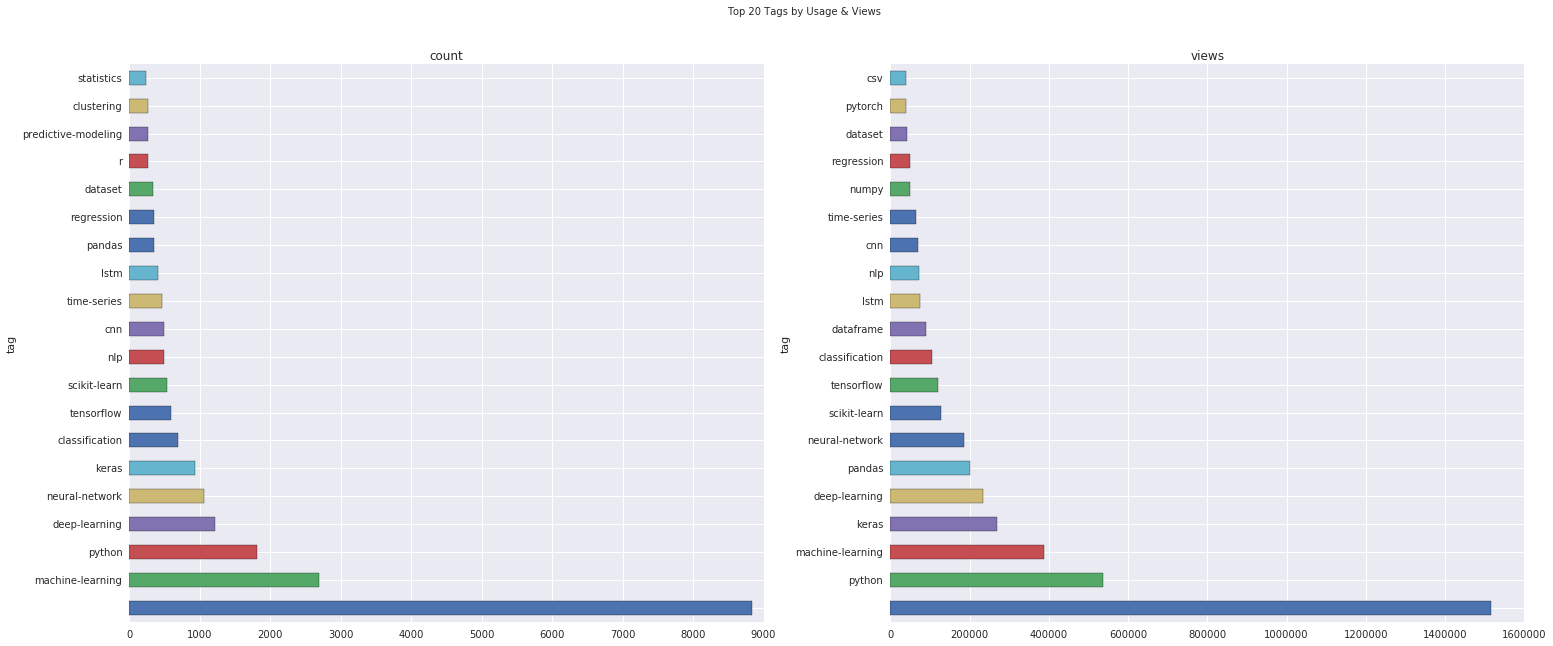

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (25,10))
top20_tags_frequency.plot(kind = 'barh', x = 'tag', y = 'count', ax = axes[0], subplots = True, legend = False, title = 'Top 20 Tags by Usage & Views')
top20_tags_views.plot(kind = 'barh', x = 'tag', y = 'views', ax = axes[1], legend = False, subplots = True, sharey = False)


### Enter Domain Knowledge

Keras, scikit-learn, and TensorFlow are all Python packages that enable deep learning.

The vast majority of the top tags are all linked to one central machine learning theme: deep learning. If we want to be more particular, we can propose developing Python content that employs deep learning to solve classification difficulties (and other variations of this suggestion).

Someone with significant subject knowledge may understand from a glance that deep learning is the most popular topic at the time, as evidenced by our analysis.

### Just a Fad?

We we'll read and transform `all_questions.csv` file that hold all of the questions ever asked on DSSE, their dates and tags.

In [35]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

To decide which questions should be classified as deep learning we should choose relevant tags. It could be: "lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning", from most-used tags.

In [36]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)
all_q.head(10)

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1
